**Task 1**

In [3]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Loan_Default.csv")
df.head()


Saving Loan_Default.csv to Loan_Default (1).csv


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.isnull().sum().sort_values(ascending=False)

,0
Upfront_charges,39642
Interest_rate_spread,36639
rate_of_interest,36439
dtir1,24121
property_value,15098
LTV,15098
income,9150
loan_limit,3344
approv_in_adv,908
age,200


In [5]:
numeric_df = df.select_dtypes(include=[np.number])
missing_ratio = numeric_df.isnull().mean()
missing_ratio.sort_values(ascending=False)

,0
Upfront_charges,0.266644
Interest_rate_spread,0.246445
rate_of_interest,0.245100
dtir1,0.162245
LTV,0.101554
property_value,0.101554
income,0.061546
term,0.000276
ID,0.000000
year,0.000000


In [15]:
X = df.drop(columns=['Status'] + ['ID'], errors="ignore")
y = df['Status']

print(X.head())
print(y.head())

   year loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0  2019         cf  Sex Not Available         nopre     type1           p1   
1  2019         cf               Male         nopre     type2           p1   
2  2019         cf               Male           pre     type1           p1   
3  2019         cf               Male         nopre     type1           p4   
4  2019         cf              Joint           pre     type1           p1   

  Credit_Worthiness open_credit business_or_commercial  loan_amount  ...  \
0                l1        nopc                  nob/c       116500  ...   
1                l1        nopc                    b/c       206500  ...   
2                l1        nopc                  nob/c       406500  ...   
3                l1        nopc                  nob/c       456500  ...   
4                l1        nopc                  nob/c       696500  ...   

    income  credit_type  Credit_Score  co-applicant_credit_type    age  \


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("tree", DecisionTreeClassifier(
        criterion="gini",
        random_state=42
    ))
])


model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['year', 'loan_amount',
                                                   'rate_of_interest',
                                                   'Interest_rate_spread',
                                                   'Upfront_charges', 'term',
                                                   'property_value', 'income',
                                                   'Credit_Score', 'LTV',
                                                   'dtir1']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'...
                                                   'approv_in_adv', 'loan_type',
                                                   'loan_purpose',
                                                   'Credit_Worthiness',
                                                   'open_credit',
                                                   'business_or_commercial',
                                                   'Neg_ammortization',
                                                   'interest_only',
                                                   'lump_sum_payment',
                                                   'construction_type',
                                                   'occupancy_type',
                                                   'Secured_by', 'total_units',
                                                   'credit_type',
                                                   'co-applicant_credit_type',
                                                   'age',
                                                   'submission_of_application',
                                                   'Region',
                                                   'Security_Type'])])),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [24]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test  Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test, digits=4))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))

Train Accuracy: 1.0000
Test  Accuracy: 1.0000

Classification Report (Test):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     22406
           1     0.9999    1.0000    0.9999      7328

    accuracy                         1.0000     29734
   macro avg     0.9999    1.0000    1.0000     29734
weighted avg     1.0000    1.0000    1.0000     29734


Confusion Matrix (Test):
[[22405     1]
 [    0  7328]]


**Training Trees with Different Depths**

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

depths = [3, 6, None]
models = {}

for d in depths:
    model = Pipeline(steps=[
        ("preprocess", preprocess),
        ("tree", DecisionTreeClassifier(
            criterion="gini",
            max_depth=d,
            random_state=42
        ))
    ])

    model.fit(X_train, y_train)
    models[d] = model

# Get feature names after preprocessing
ohe = models[3].named_steps["preprocess"] \
               .named_transformers_["cat"] \
               .named_steps["onehot"]

cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_feature_names)




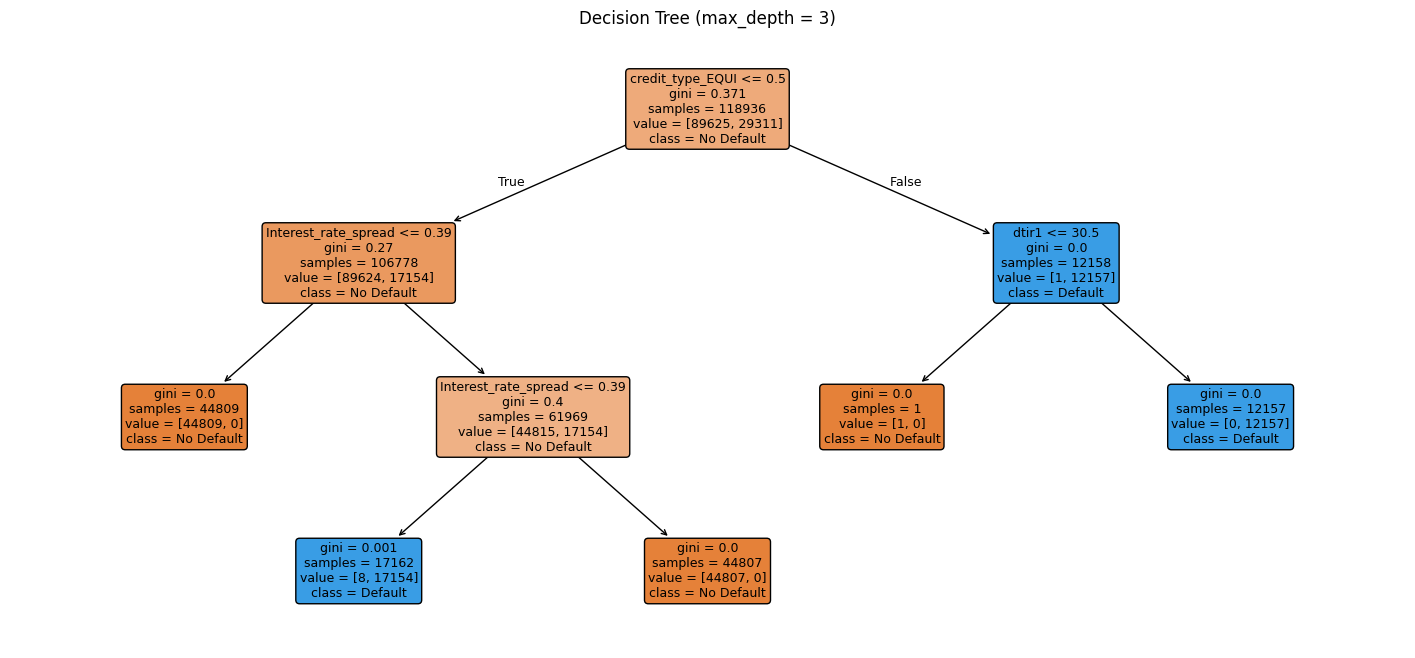

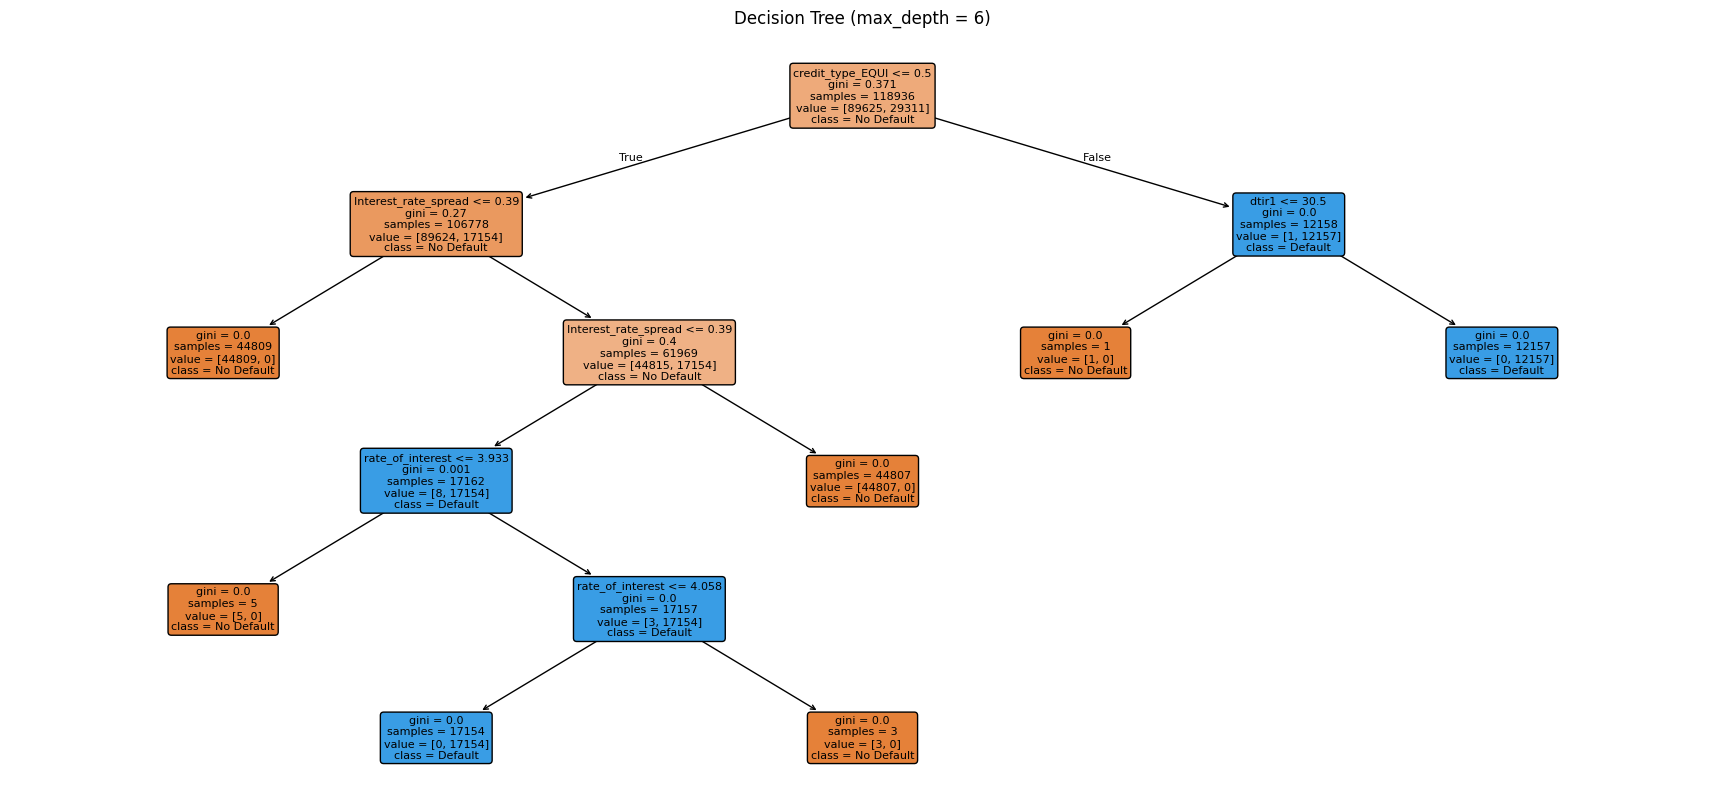

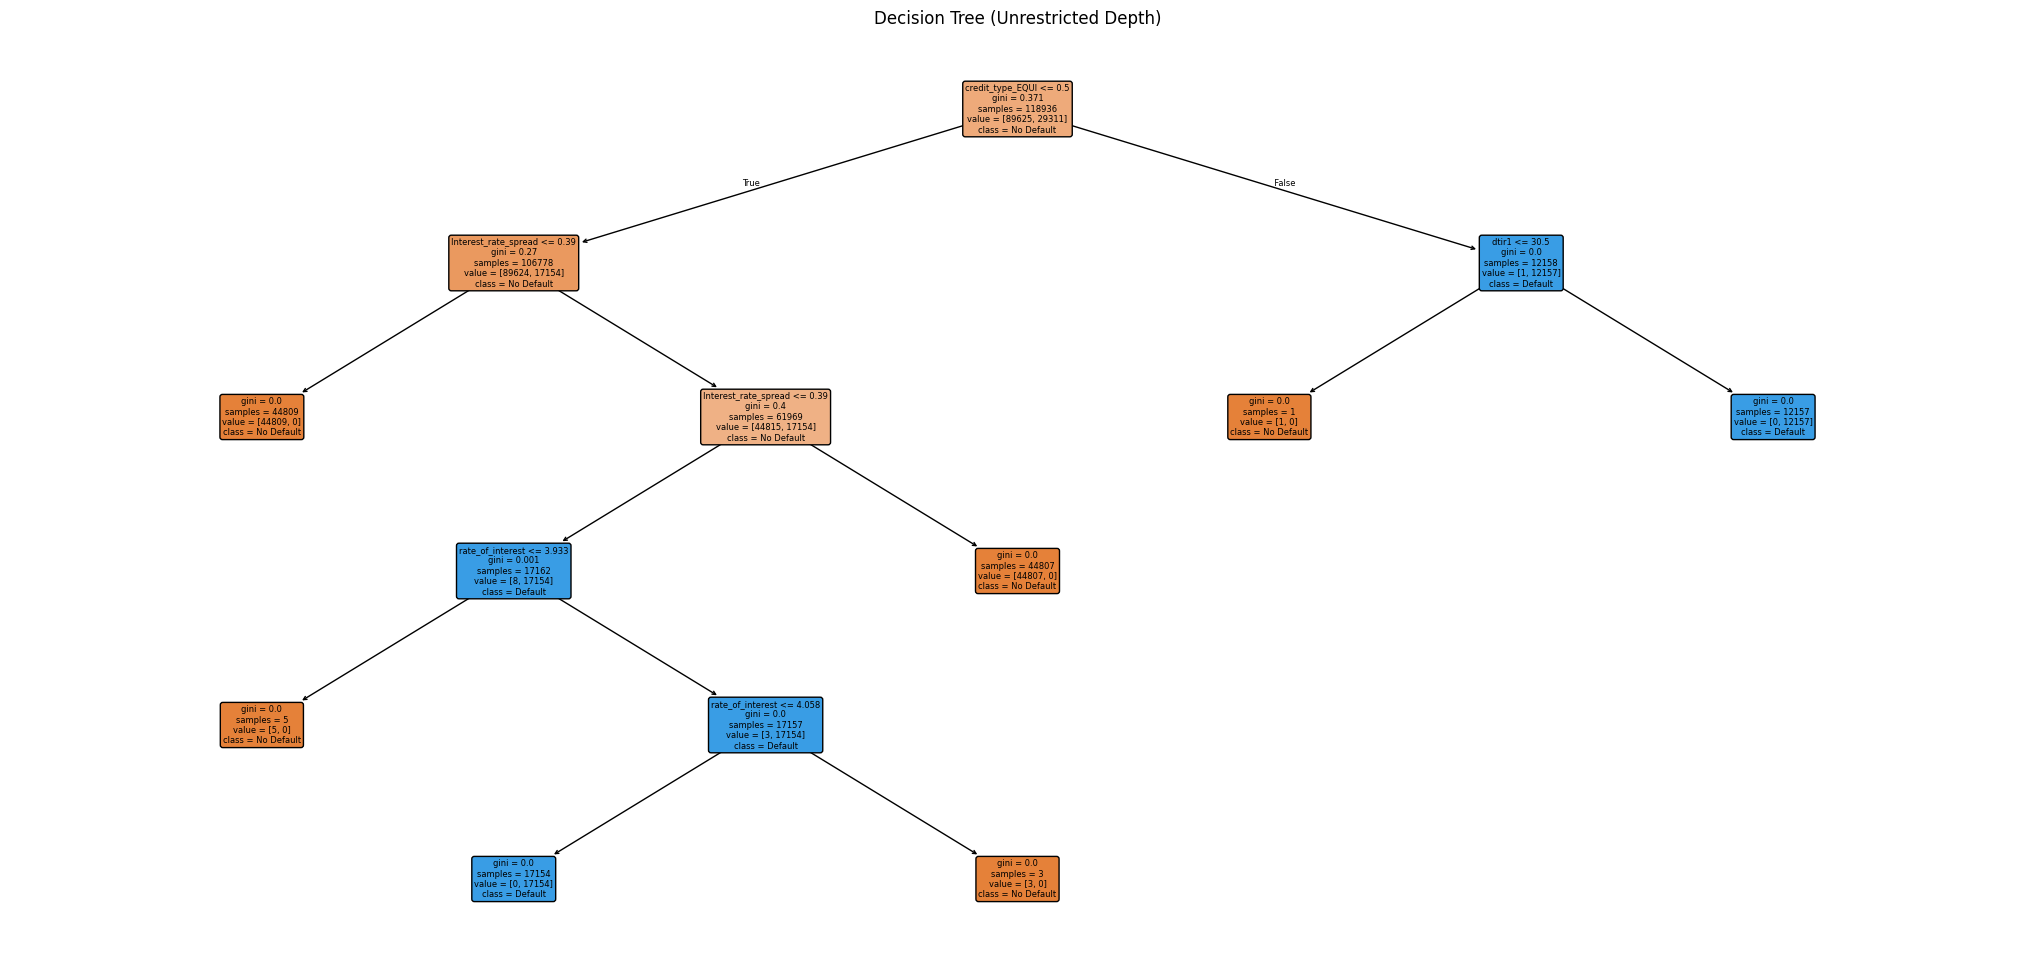

In [26]:
# Shallow Depth Tree
plt.figure(figsize=(18, 8))
plot_tree(
    models[3].named_steps["tree"],
    feature_names=feature_names,
    class_names=["No Default", "Default"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree (max_depth = 3)")
plt.show()


# Medium Depth Tree
plt.figure(figsize=(22, 10))
plot_tree(
    models[6].named_steps["tree"],
    feature_names=feature_names,
    class_names=["No Default", "Default"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree (max_depth = 6)")
plt.show()

#No max depth tree
plt.figure(figsize=(26, 12))
plot_tree(
    models[None].named_steps["tree"],
    feature_names=feature_names,
    class_names=["No Default", "Default"],
    filled=True,
    rounded=True,
    fontsize=6
)
plt.title("Decision Tree (Unrestricted Depth)")
plt.show()



**Decision Tree with max_depth = 3**

The shallow decision tree focuses on a small number of features, splitting first on loan credit type and then on interest rate spread. This structure results in a model that captures general patterns in the data. However, the model may underfit due to its limited depth by failing to capture non-linear relationships between the attributes.

**Decision Tree with max_depth = 6**

Increasing the maximum depth allows the tree to have more splits, specifically involving interest rate and debt-to-income variables. While the overall structure remains similar to the shallow tree, the added depth allows the model to narrow its decision boundaries and better capture relationships. This  represents a better balance between interpretability and performance.

**Decision Tree with Unrestricted Depth**

The unrestricted decision tree grows deeper and introduces additional splits but does not significantly alter the primary structure observed in the shallower models. Many branches quickly reach leaf nodes, showing strong separation in the data. While this model can achieve inredibly high training accuracy, its increased complexity raises concerns about overfitting, and in a practical setting, potentialy runtime depending on the complexity and/or volume of data.

**Sensitivity Analysis**

Sensitivity analysis is used to determine how changes in model inputs affect the outputs or predictions. It helps identify which features have the greatest affect on a model’s decisions and is an machine learning Applying this to tree-based models, sensitivity can be determined through feature importance scores and methods like partial dependence plots. Together, these approaches help understand how the decision boundary of a trained model responds to changes in key variables.

https://towardsdatascience.com/the-sensitivity-analysis-a-powerful-yet-underused-tool-for-data-scientists-e553fa695976/

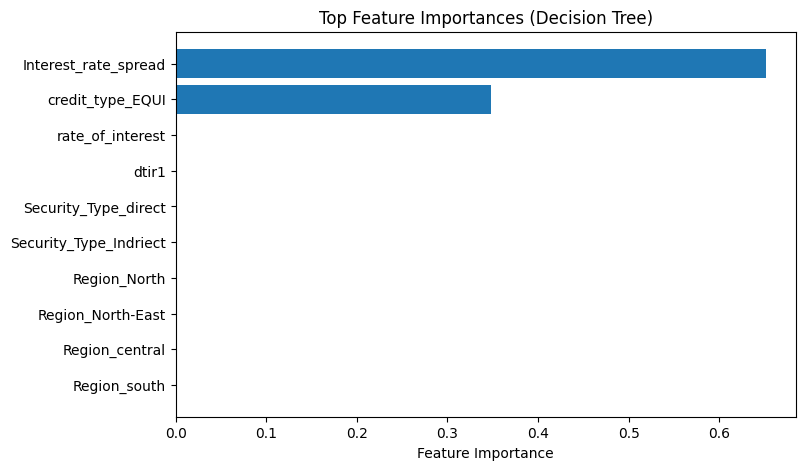

In [27]:
# Feature Importance


import numpy as np
import matplotlib.pyplot as plt

# Use the medium-depth tree
tree_model = models[6].named_steps["tree"]

importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]

top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(8,5))
plt.barh(top_features[::-1], top_importances[::-1])
plt.xlabel("Feature Importance")
plt.title("Top Feature Importances (Decision Tree)")
plt.show()


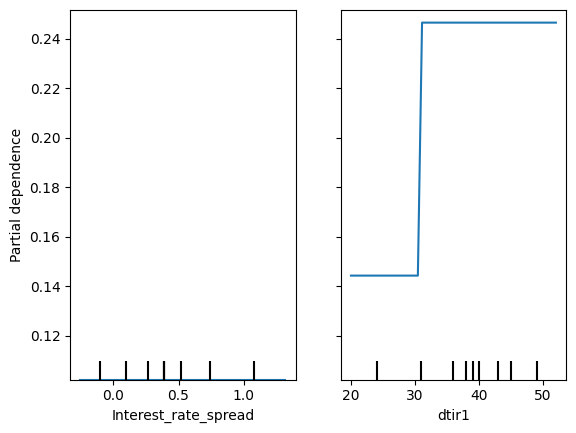

In [28]:
#Partial Dependence Plots

from sklearn.inspection import PartialDependenceDisplay

features_to_plot = [
    feature_names.index("Interest_rate_spread"),
    feature_names.index("dtir1")
]

X_transformed = models[6].named_steps["preprocess"].transform(X_train)

PartialDependenceDisplay.from_estimator(
    tree_model,
    X_transformed,
    features=features_to_plot,
    feature_names=feature_names,
    grid_resolution=50
)

plt.show()


**Task 2**

In [29]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split

# Stratified subsample for speed (keeps class ratio) <- Wifi at home was not allowing for larger samples
X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=40000,
    random_state=42,
    stratify=y
)


scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "f1": "f1"
}

def evaluate_model(model, X, y, k):
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    return {
        metric: np.mean(scores[f"test_{metric}"])
        for metric in scoring
    }


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rf_fast = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=60,
        max_depth=12,
        min_samples_leaf=5,
        n_jobs=-1,
        random_state=42
    ))
])



ada_fast = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
        n_estimators=80,
        learning_rate=0.8,
        random_state=42
    ))
])


In [31]:

folds = [5, 10, 15]
rows = []

for k in folds:
    rf_scores  = evaluate_model(rf_fast,  X_small, y_small, k)
    ada_scores = evaluate_model(ada_fast, X_small, y_small, k)

    rows.append({"model": "RandomForest (bagging)", "k": k, **rf_scores})
    rows.append({"model": "AdaBoost (boosting)",   "k": k, **ada_scores})

results_df = pd.DataFrame(rows)

print(results_df.pivot(index="model", columns="k", values=["accuracy","precision","f1"]))


                        accuracy                     precision            \
k                             5         10        15        5         10   
model                                                                      
AdaBoost (boosting)     1.000000  0.999950  0.999975  1.000000  0.999797   
RandomForest (bagging)  0.999975  0.999925  1.000000  0.999899  1.000000   

                                        f1                      
k                             15        5         10        15  
model                                                           
AdaBoost (boosting)     0.999899  1.000000  0.999899  0.999949  
RandomForest (bagging)  1.000000  0.999949  0.999848  1.000000  


For Task 2, Random Forest was selected as the bagging-based ensemble method, and AdaBoost was selected as the boosting-based method. Both models were evaluated using stratified k-fold cross-validation with k = 5, 10, and 15 folds. Performance was measured using accuracy, precision, and F1-score.

Both ensemble methods achieved near-perfect performance across all metrics, indicating that the dataset is highly separable. The relative ranking of model performance varied slightly depending on the evaluation metric, highlighting the importance of using multiple metrics when evaluating classification models. Overall, both ensemble approaches significantly outperformed a single decision tree and showed strong generalization across different cross-validation settings.

**Task 3**

=== Selected Fold Metrics (k=5, same fold for all models) ===
Decision Tree: accuracy=1.000000, precision=1.000000, f1=1.000000


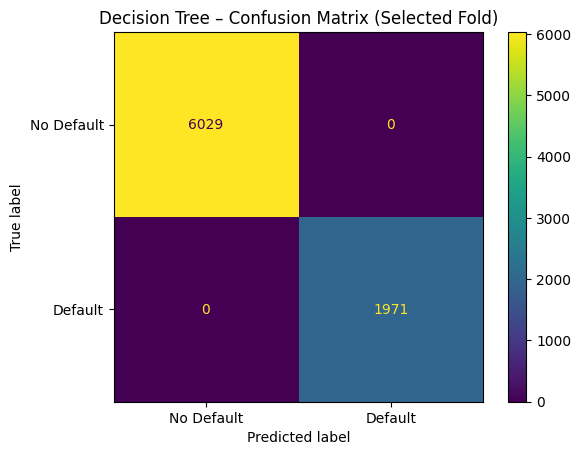

Random Forest: accuracy=0.999875, precision=0.999493, f1=0.999746


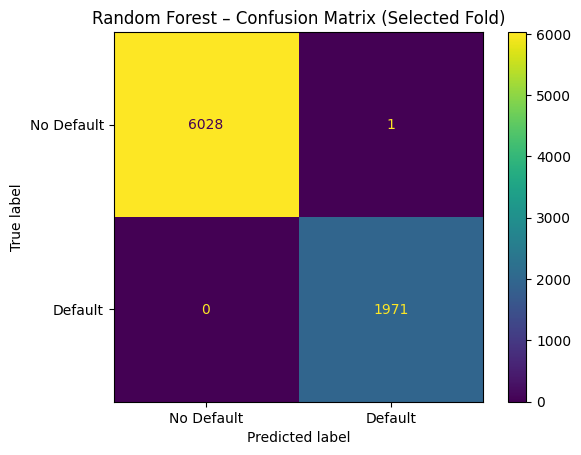

AdaBoost: accuracy=1.000000, precision=1.000000, f1=1.000000


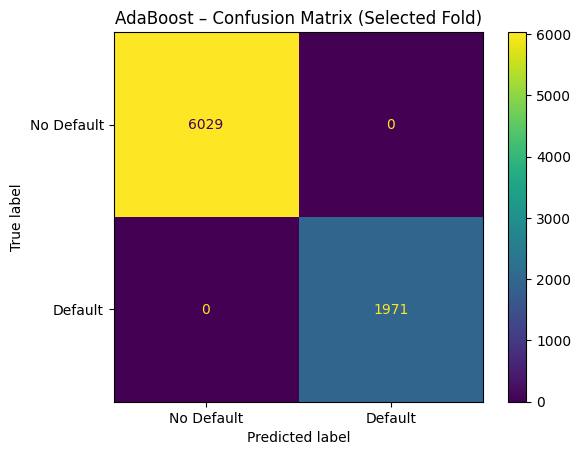

In [33]:

from sklearn.metrics import (

    accuracy_score,
    precision_score,
    f1_score
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold



cv_cm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_idx, test_idx = next(cv_cm.split(X_small, y_small))

X_tr = X_small.iloc[train_idx]
X_te = X_small.iloc[test_idx]
y_tr = y_small.iloc[train_idx]
y_te = y_small.iloc[test_idx]

models = {
    "Decision Tree": model,
    "Random Forest": rf_fast,
    "AdaBoost": ada_fast
}

print("=== Selected Fold Metrics (k=5, same fold for all models) ===")
fold_preds = {}

for name, model in models.items():
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    fold_preds[name] = preds

    acc = accuracy_score(y_te, preds)
    prec = precision_score(y_te, preds, zero_division=0)
    f1 = f1_score(y_te, preds, zero_division=0)

    print(f"{name}: accuracy={acc:.6f}, precision={prec:.6f}, f1={f1:.6f}")

    cm = confusion_matrix(y_te, preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No Default", "Default"])
    disp.plot()
    plt.title(f"{name} – Confusion Matrix (Selected Fold)")
    plt.show()

#

In [34]:

from scipy.stats import ttest_rel

def per_fold_scores(model, X, y, k=10):
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    f1s = []
    for tr_i, te_i in cv.split(X, y):
        Xtr, Xte = X.iloc[tr_i], X.iloc[te_i]
        ytr, yte = y.iloc[tr_i], y.iloc[te_i]
        model.fit(Xtr, ytr)
        pred = model.predict(Xte)
        f1s.append(f1_score(yte, pred, zero_division=0))
    return np.array(f1s)

k_stats = 10
dt_f1  = per_fold_scores(model, X_small, y_small, k=k_stats)
rf_f1  = per_fold_scores(rf_fast, X_small, y_small, k=k_stats)
ada_f1 = per_fold_scores(ada_fast, X_small, y_small, k=k_stats)

print(f"Paired t-tests on F1 (Stratified {k_stats}-fold)")
print("Decision Tree vs Random Forest:", ttest_rel(dt_f1, rf_f1))
print("Decision Tree vs AdaBoost:",      ttest_rel(dt_f1, ada_f1))
print("Random Forest vs AdaBoost:",      ttest_rel(rf_f1, ada_f1))

print(f"\nMean += Std F1 across folds (k={k_stats})")
print(f"Decision Tree:  {dt_f1.mean():.6f} +- {dt_f1.std(ddof=1):.6f}")
print(f"Random Forest:  {rf_f1.mean():.6f} +- {rf_f1.std(ddof=1):.6f}")
print(f"AdaBoost:       {ada_f1.mean():.6f} +- {ada_f1.std(ddof=1):.6f}")

Paired t-tests on F1 (Stratified 10-fold)
Decision Tree vs Random Forest: TtestResult(statistic=np.float64(0.36142316861890533), pvalue=np.float64(0.7261223985211944), df=np.int64(9))
Decision Tree vs AdaBoost: TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.int64(9))
Random Forest vs AdaBoost: TtestResult(statistic=np.float64(-0.36142316861890533), pvalue=np.float64(0.7261223985211944), df=np.int64(9))

Mean += Std F1 across folds (k=10)
Decision Tree:  0.999899 +- 0.000214
Random Forest:  0.999848 +- 0.000343
AdaBoost:       0.999899 +- 0.000214


The confusion matrix shows near-perfect classification performance across all three models. The decision tree, Random Forest, and AdaBoost models correctly classify almost all outcomes, with no meaningful difference in misclassification patterns, indicating strong separability in the dataset.

To determine whether performance differences between models are  significant, paired t-tests were conducted using F1-scores from stratified 10-fold cross-validation. None of the comparisons yielded statistically significant results, indicating that the observed performance differences are not meaningful. All three models achieve near-perfect mean F1-scores with extremely low variance across folds, indicating stable and consistent performance.

When looking at bias–variance tradeoff, the single decision tree shows low bias but higher variance due to its sensitivity to training data. Random Forest reduces variance through the use of multiple trees, while AdaBoost reduces bias by iteratively focusing on misclassified observations. In this dataset, all models perform comparably well, implying that loan default prediction is driven by a small number of highly informative features.